In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [8]:
data = pd.read_csv('../main/log/moreblocks_20240917.csv', names = ['dataset', 'algorithm', 'seed', 'operator', 'size',
                                                                   'nodes', 'depth', 'operation_index',
                                                                   'train_variation', 'test_variation', 'train_output'])

In [9]:
data['train_output'] = data['train_output'].apply(lambda x: float(x.split('(')[-1].split(')')[0])) 

In [10]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_variation,test_variation,train_output
1806205,ld50,SLIM*1NORM,29,deflate,1000,6049,1005,994,0.982906,0,58.9799
1806206,ld50,SLIM*1NORM,29,deflate,1000,6937,1005,995,0.982906,0,94.1403
1806207,ld50,SLIM*1NORM,29,deflate,1000,12093,1005,996,0.982906,0,1440.3629
1806208,ld50,SLIM*1NORM,29,deflate,1000,14911,1005,997,0.982906,0,12997.1562
1806209,ld50,SLIM*1NORM,29,deflate,1000,4939,1005,998,0.982906,0,43.5892


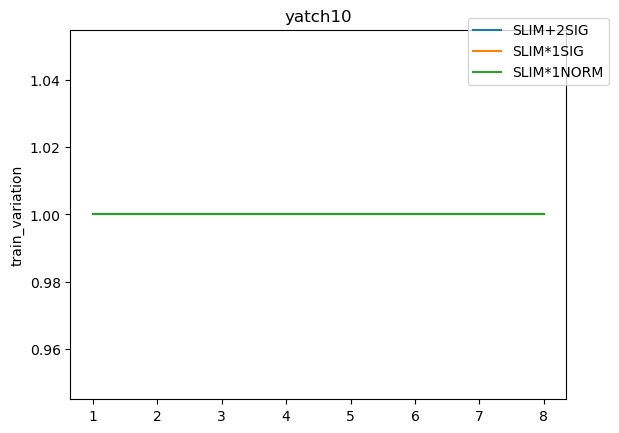

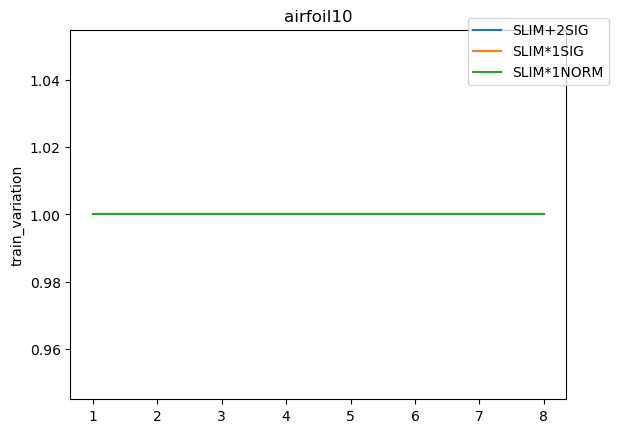

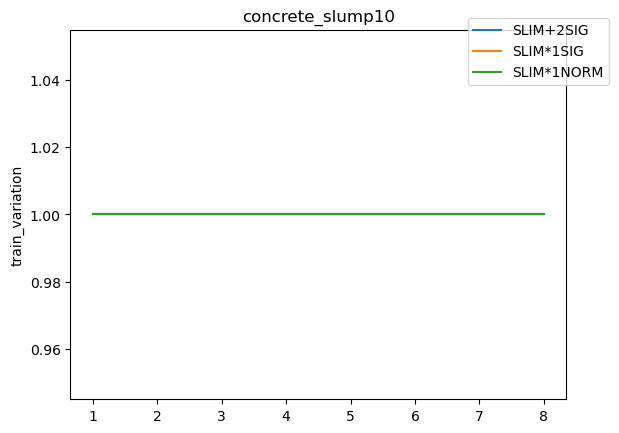

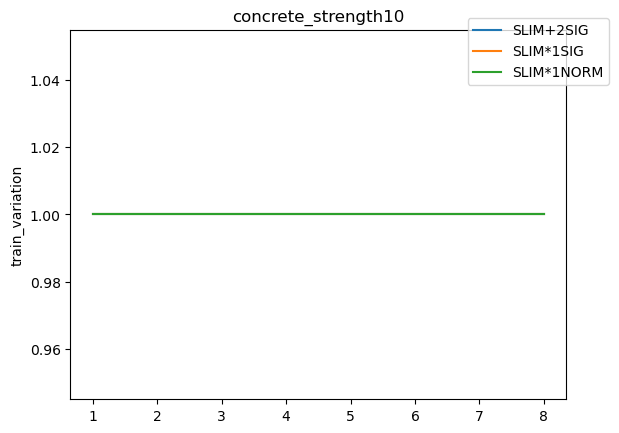

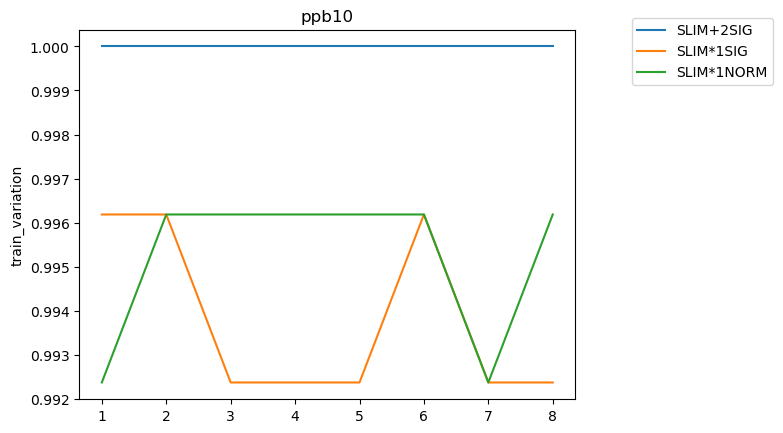

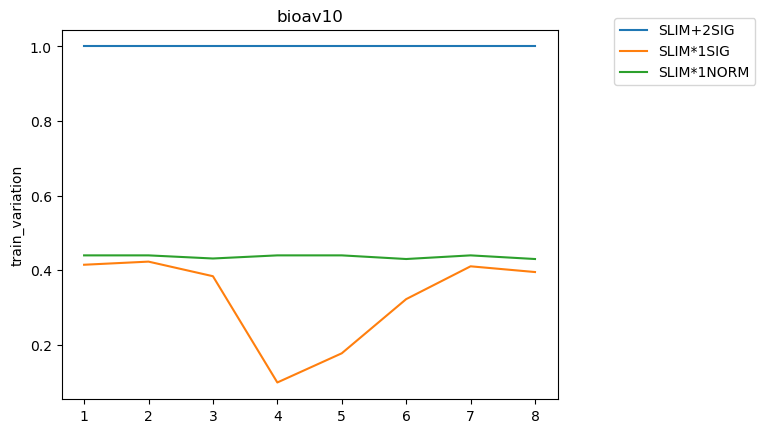

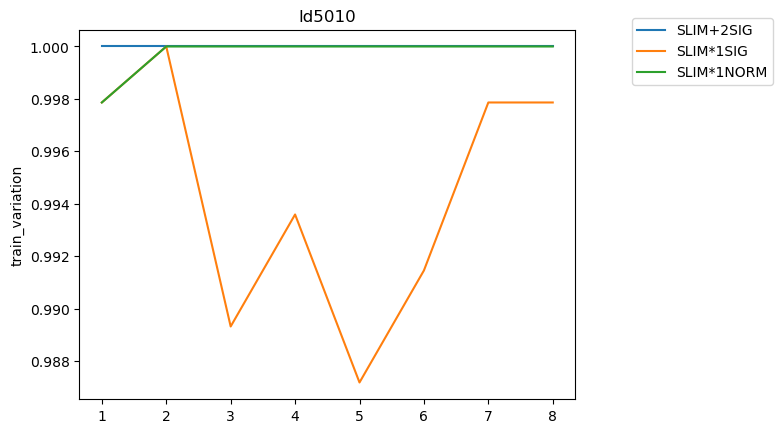

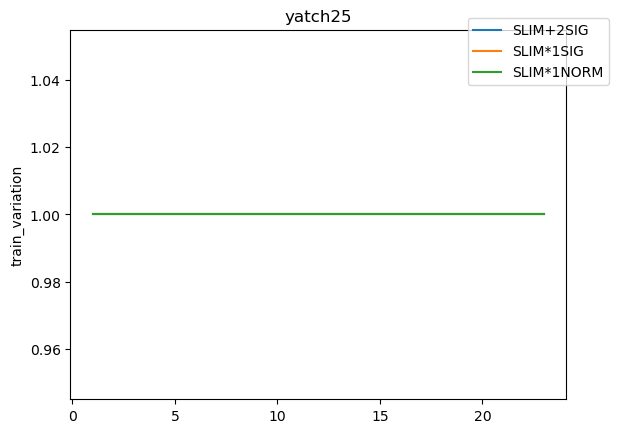

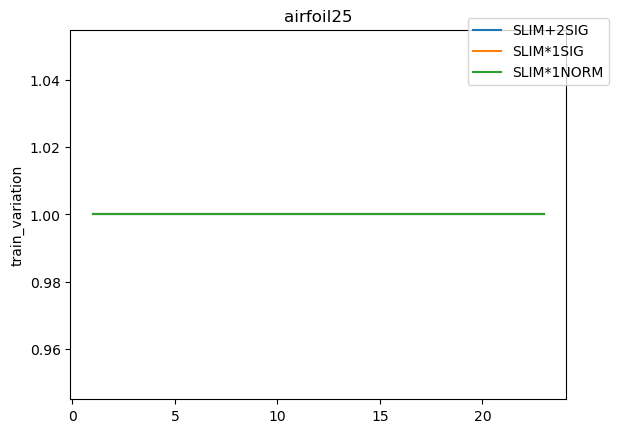

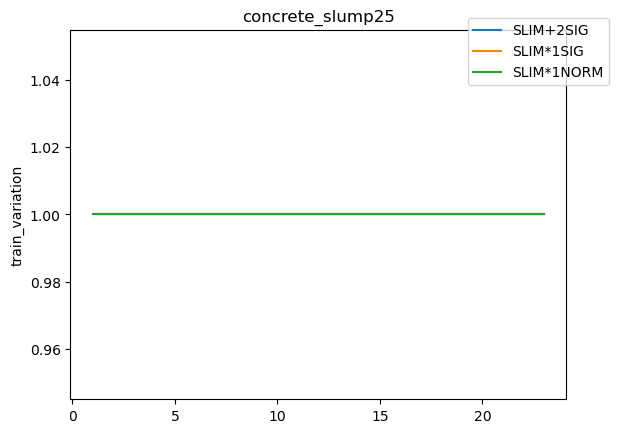

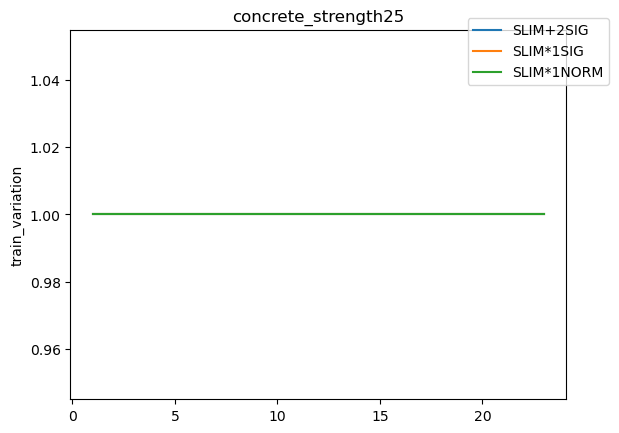

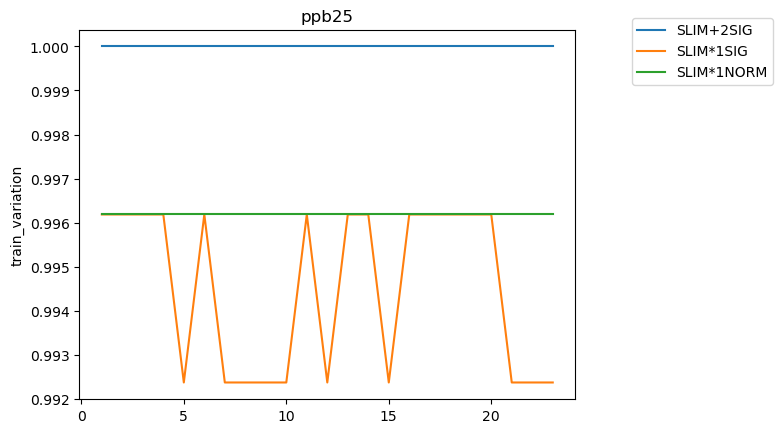

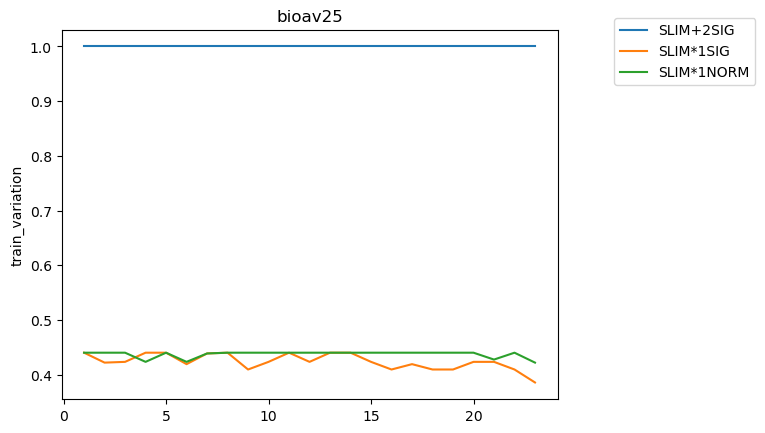

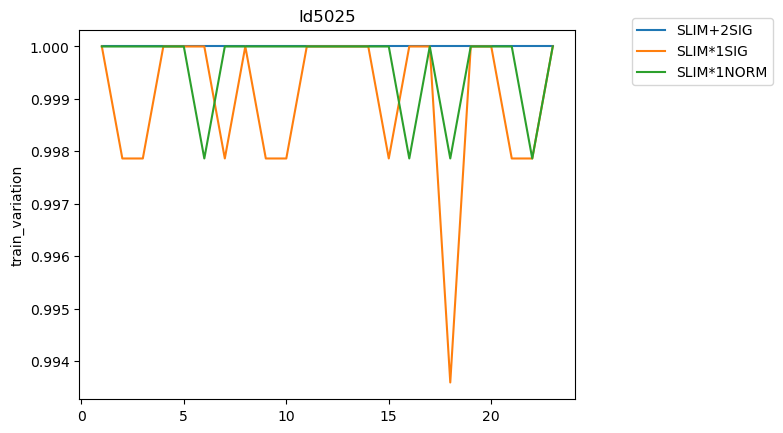

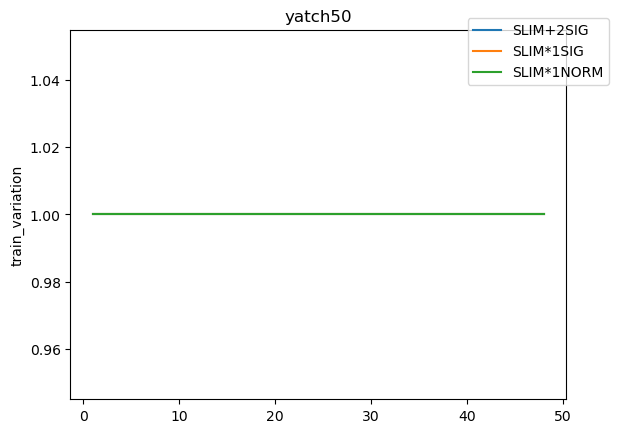

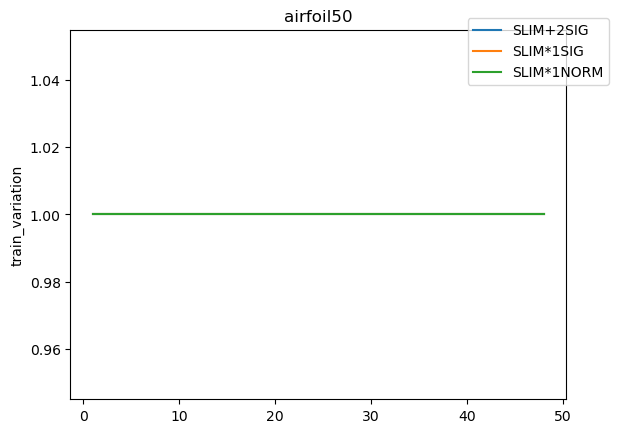

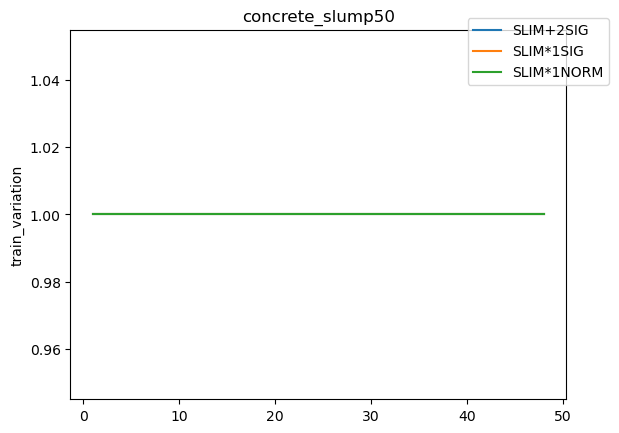

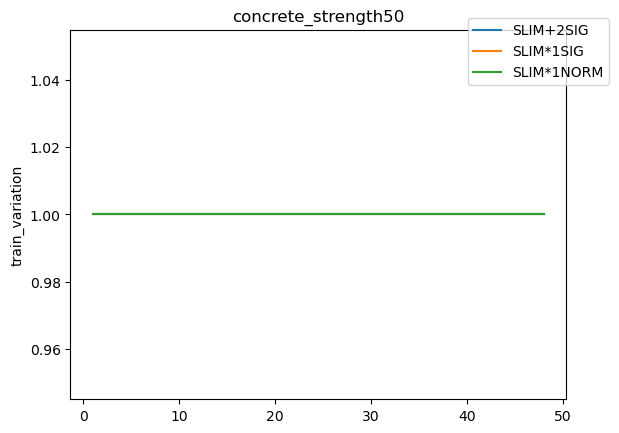

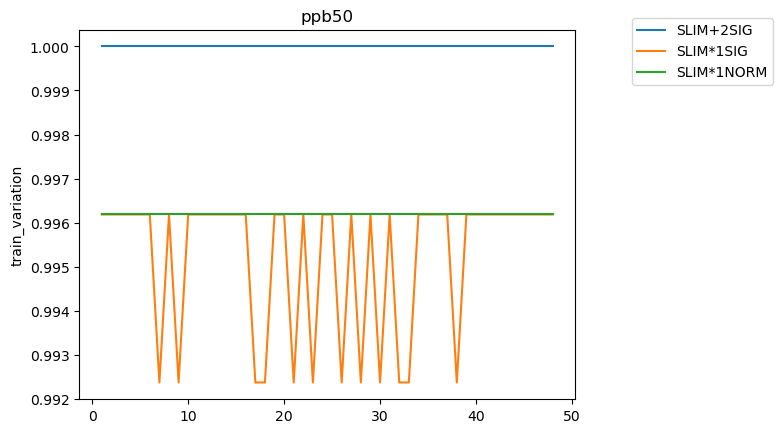

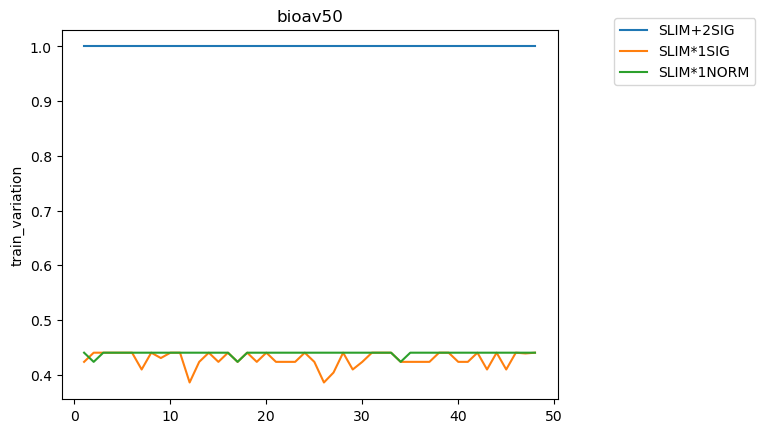

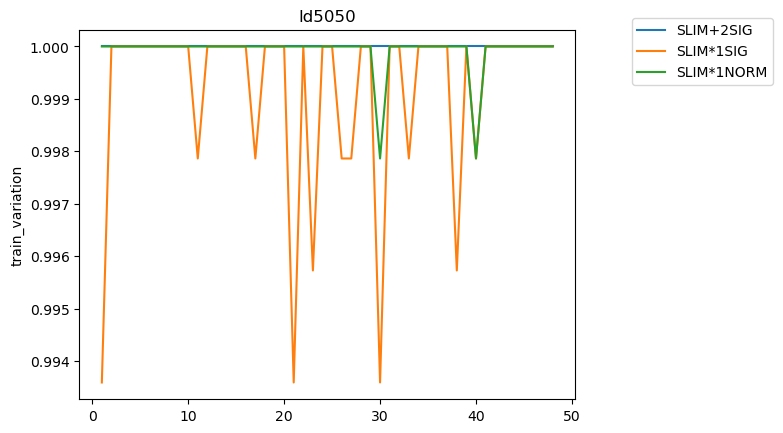

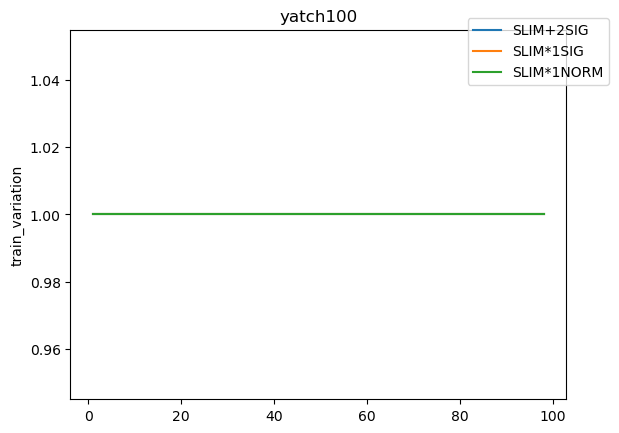

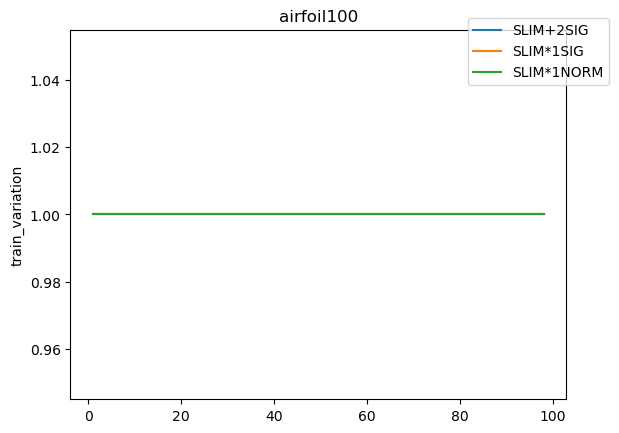

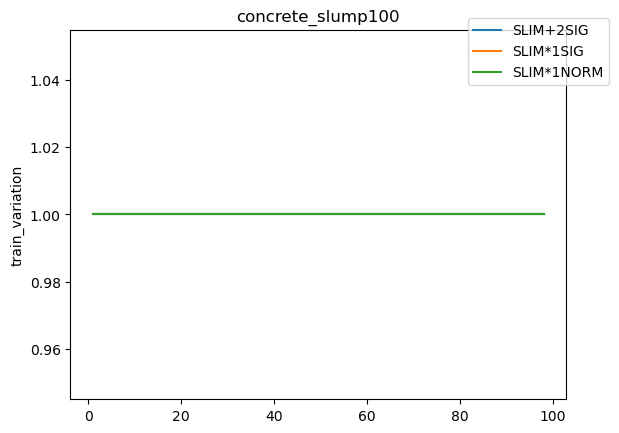

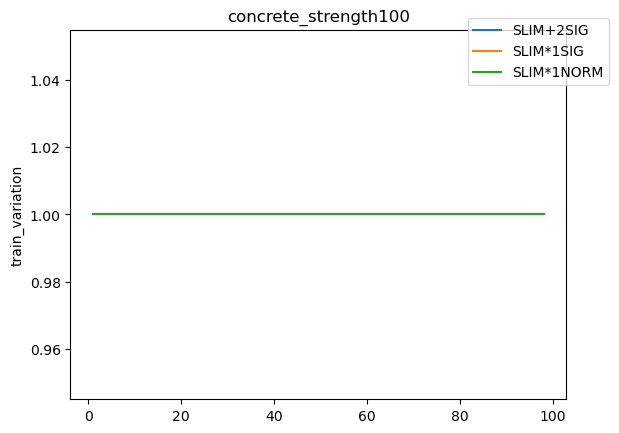

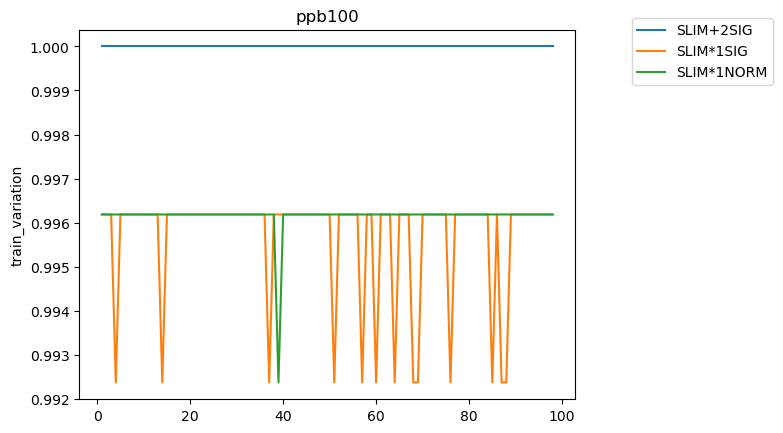

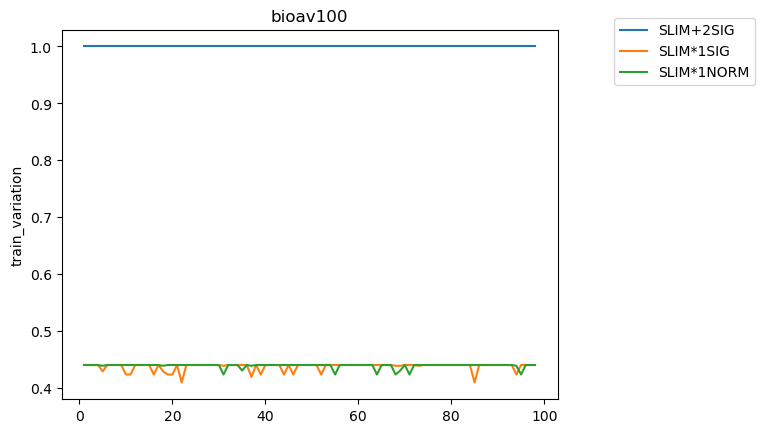

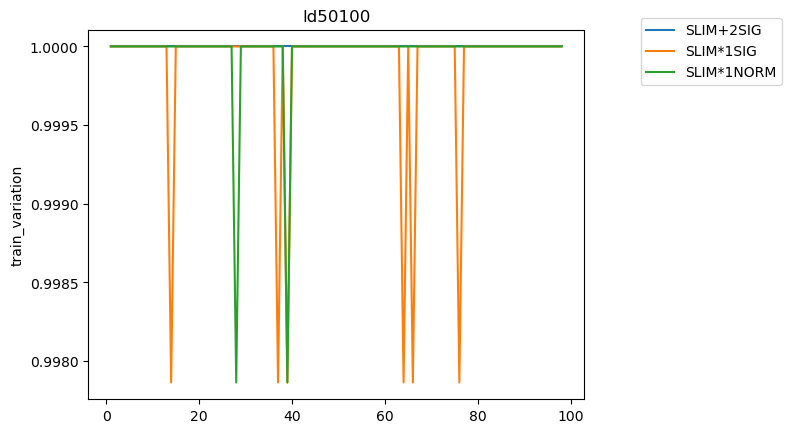

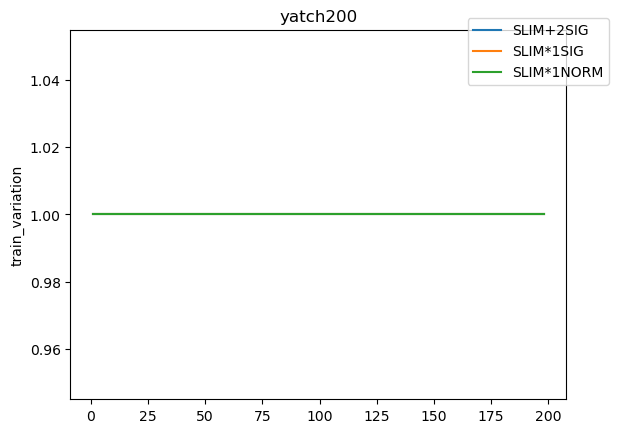

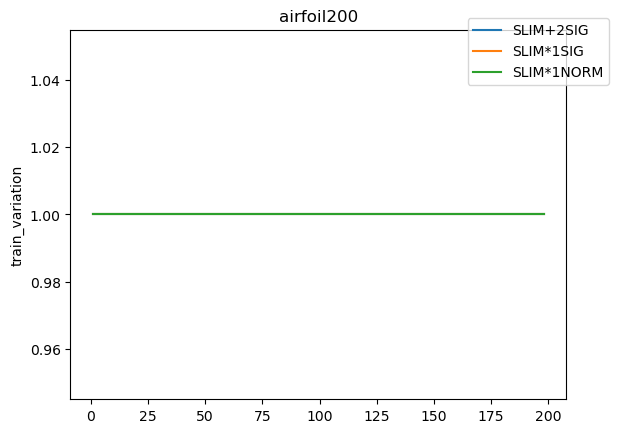

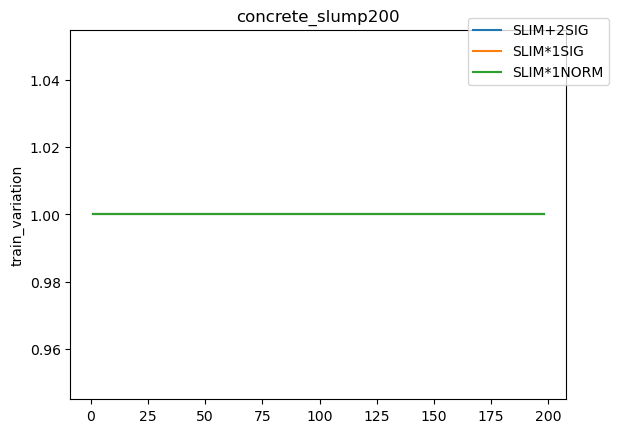

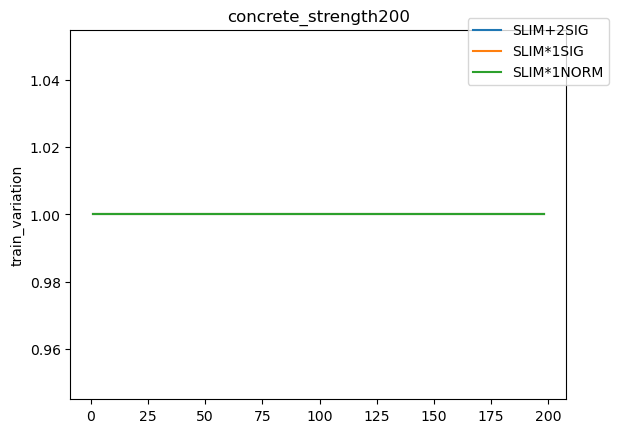

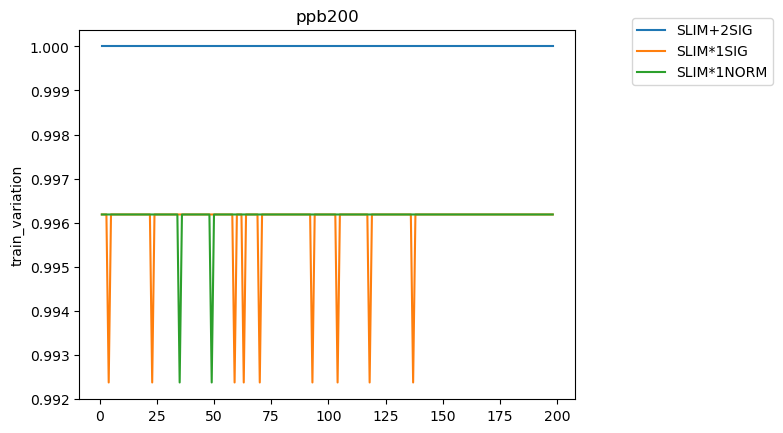

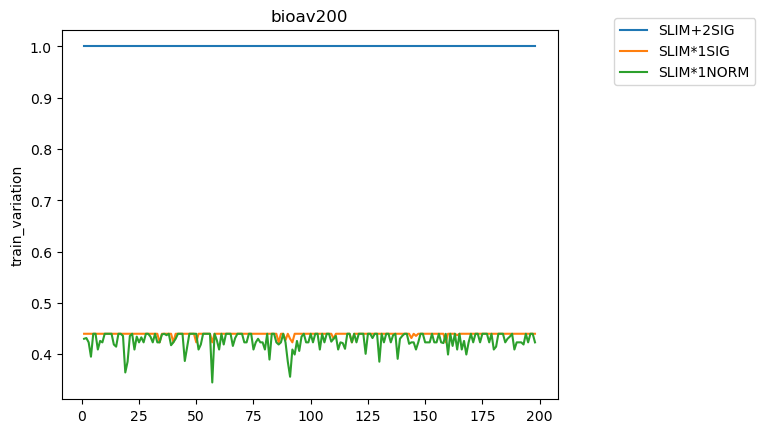

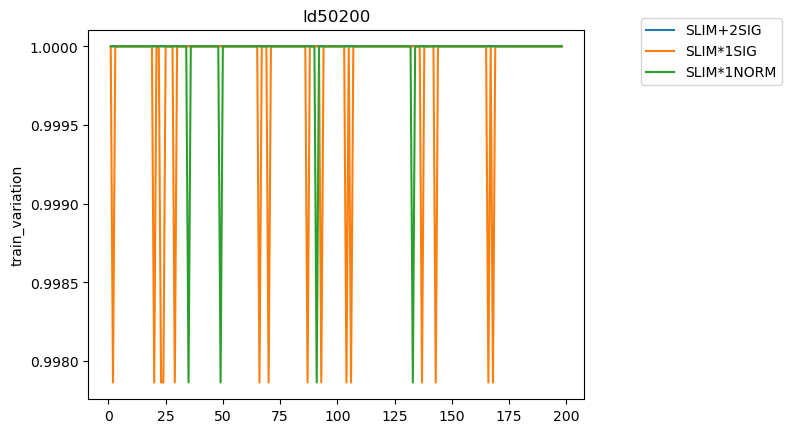

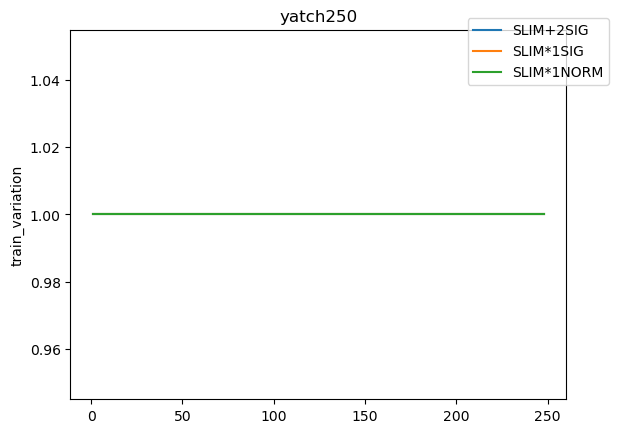

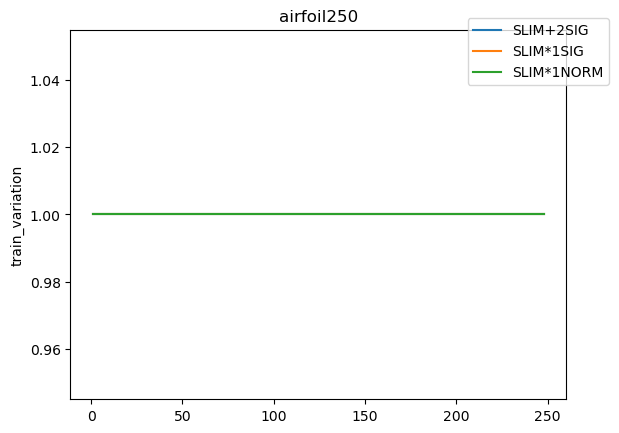

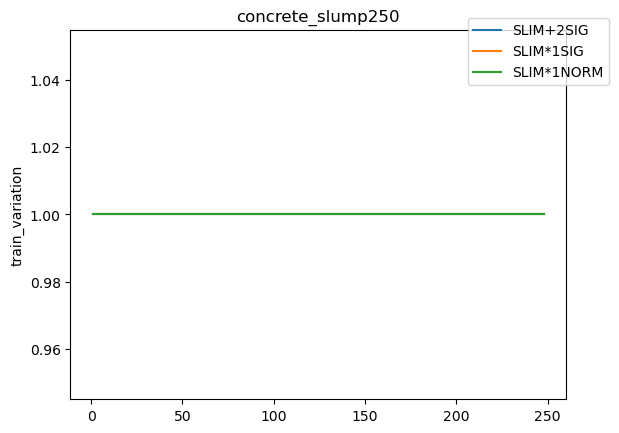

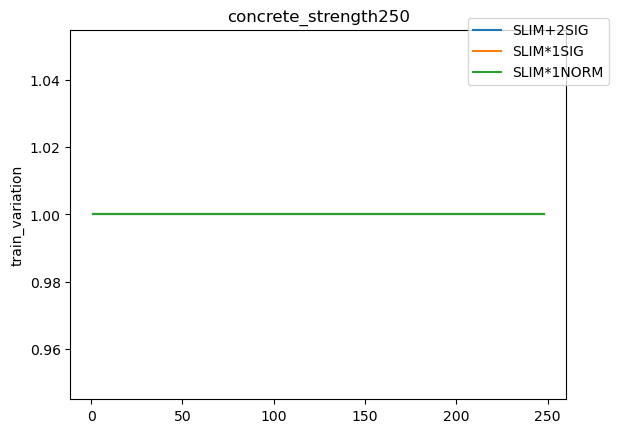

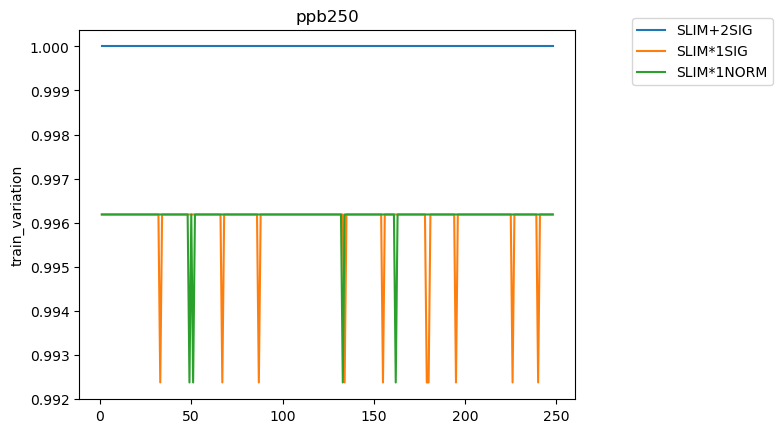

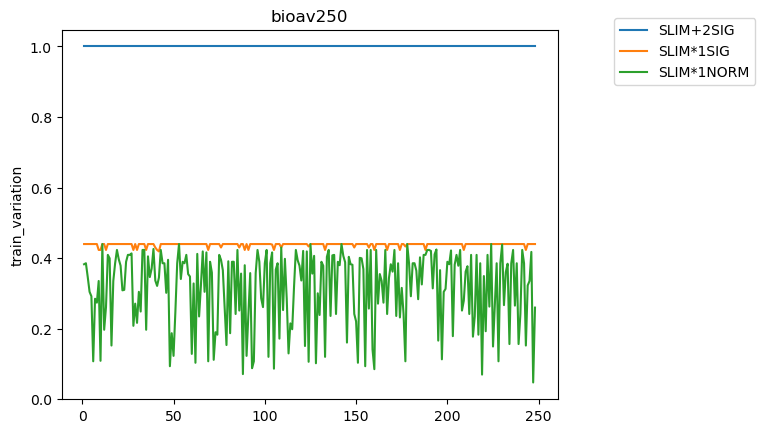

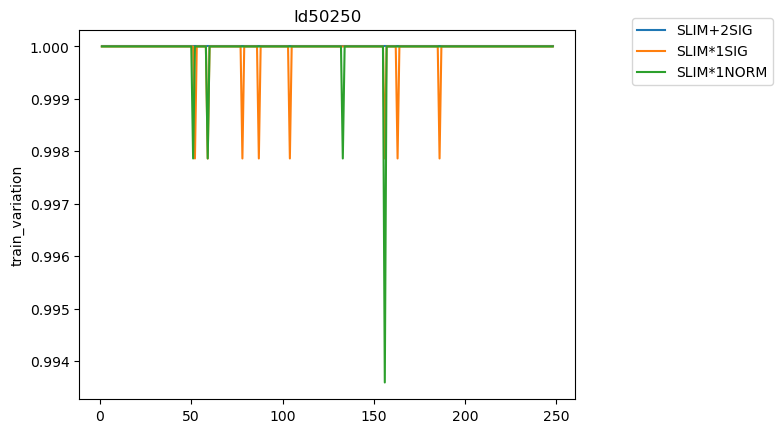

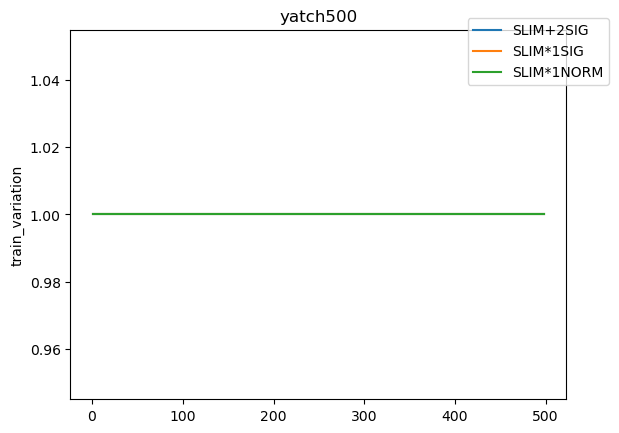

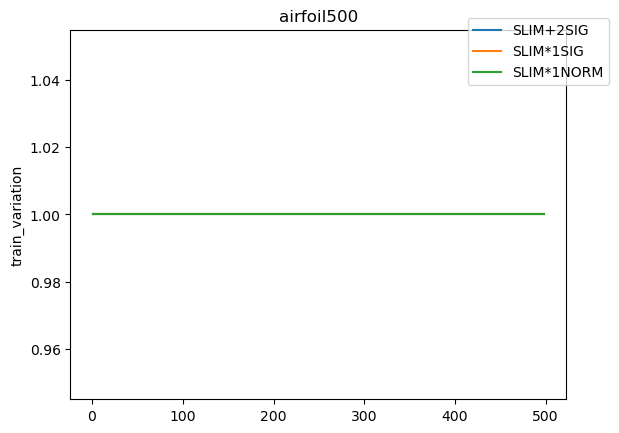

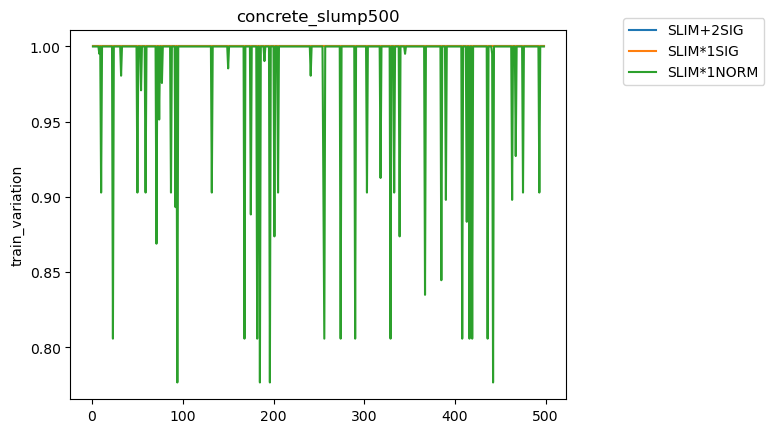

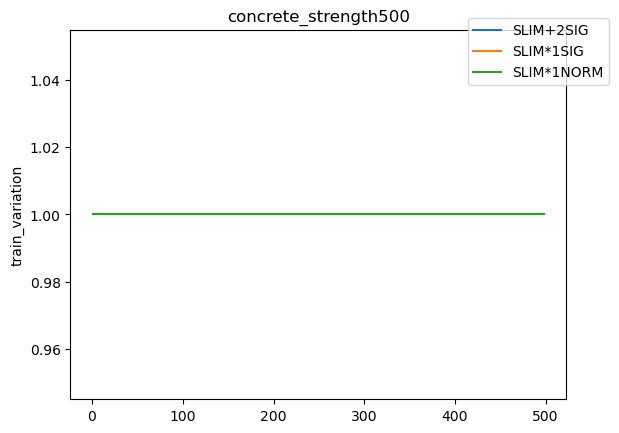

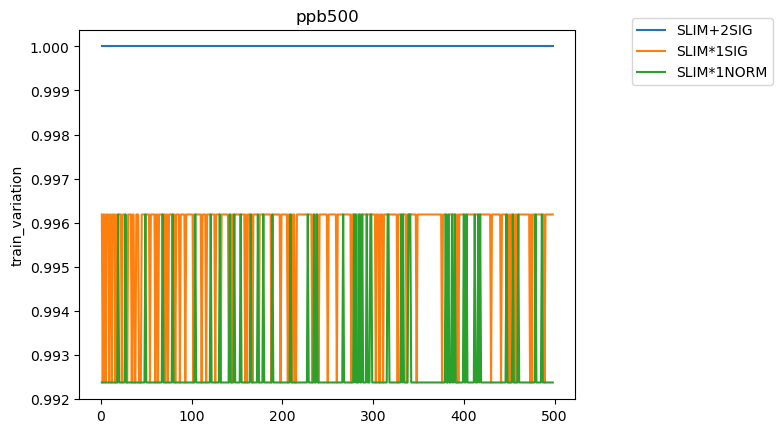

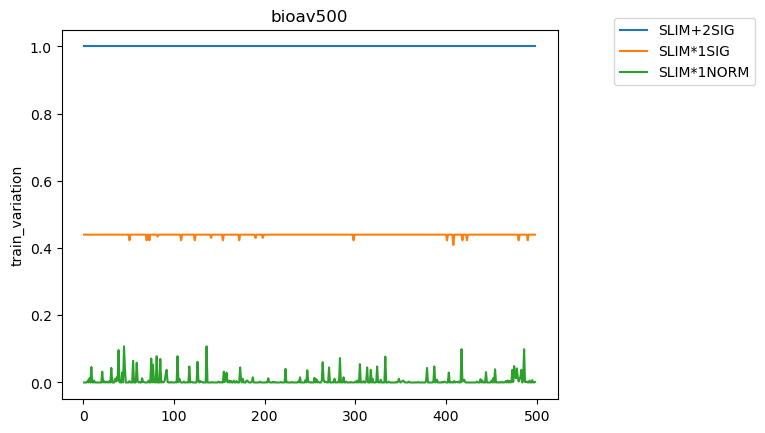

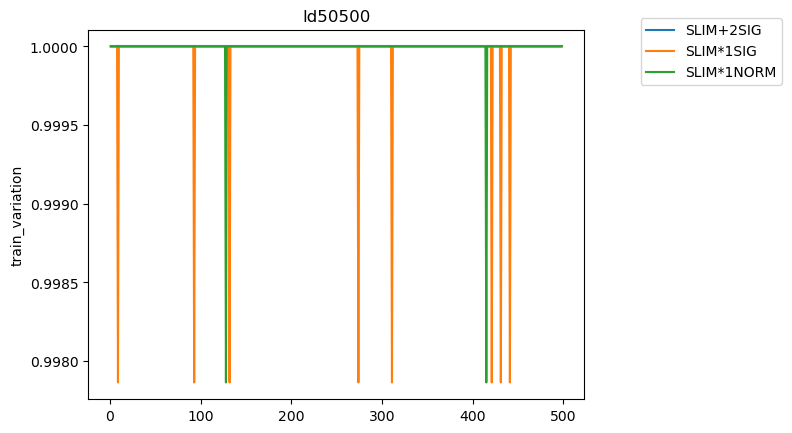

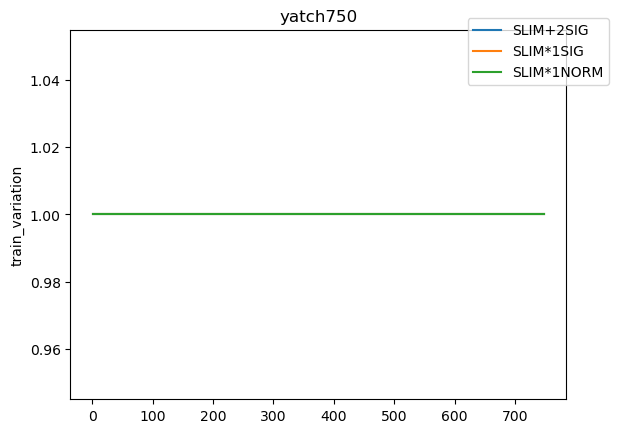

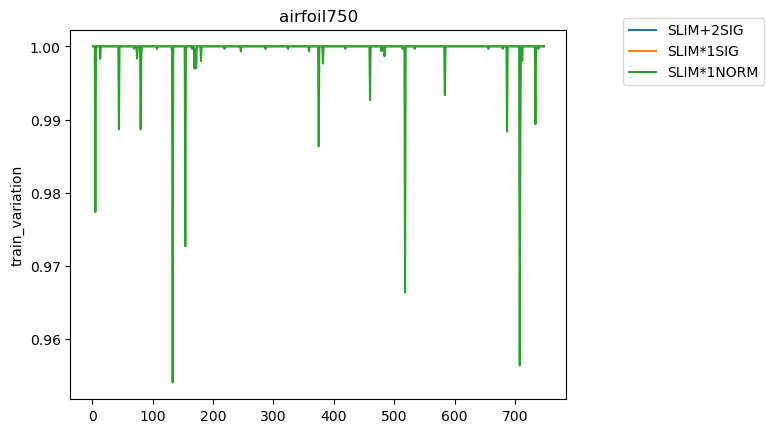

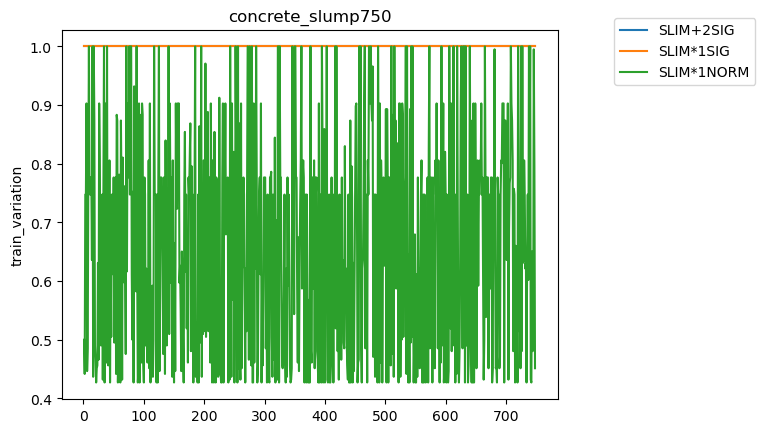

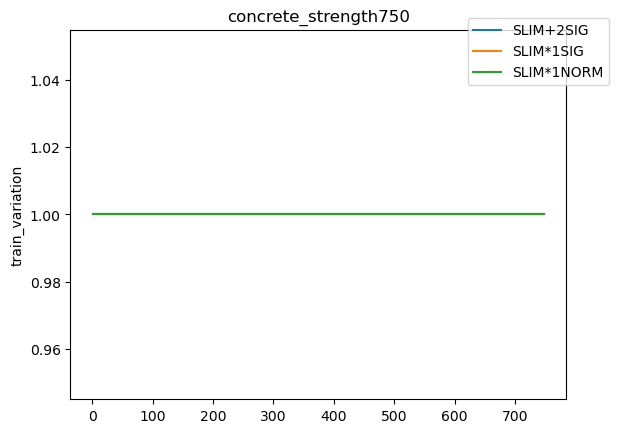

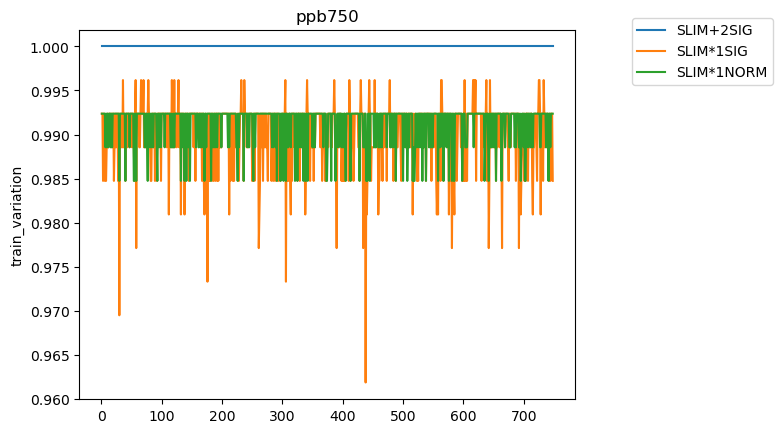

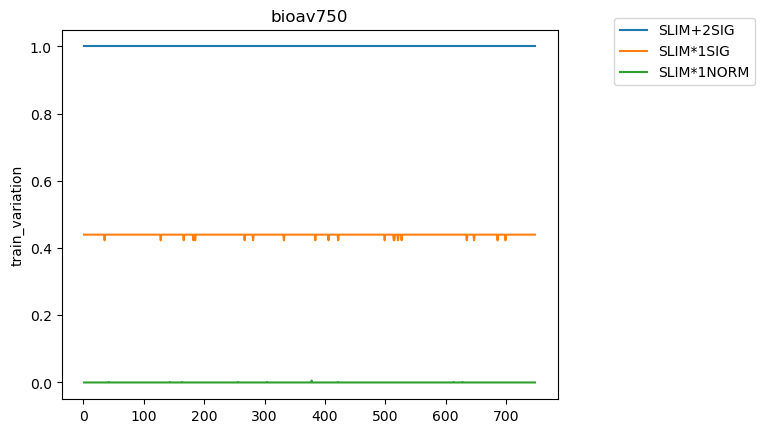

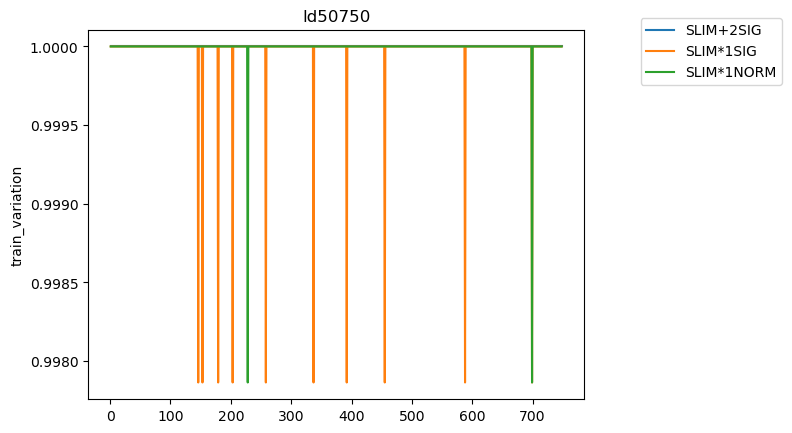

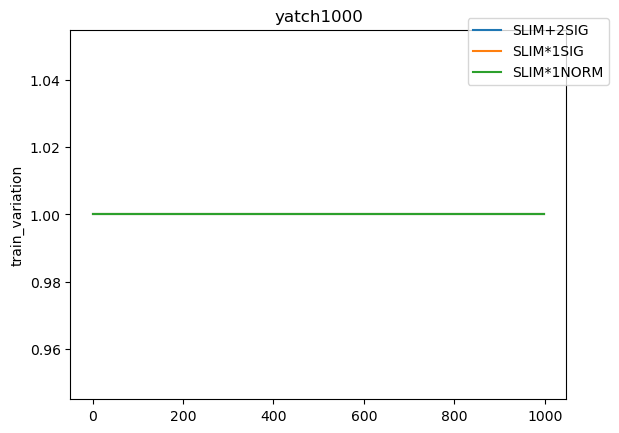

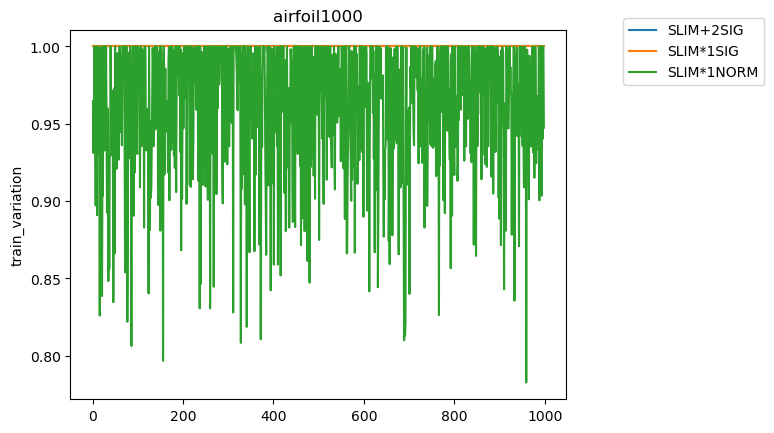

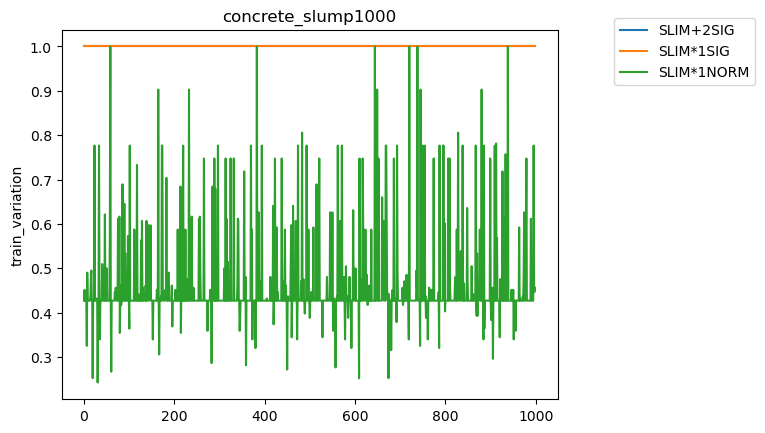

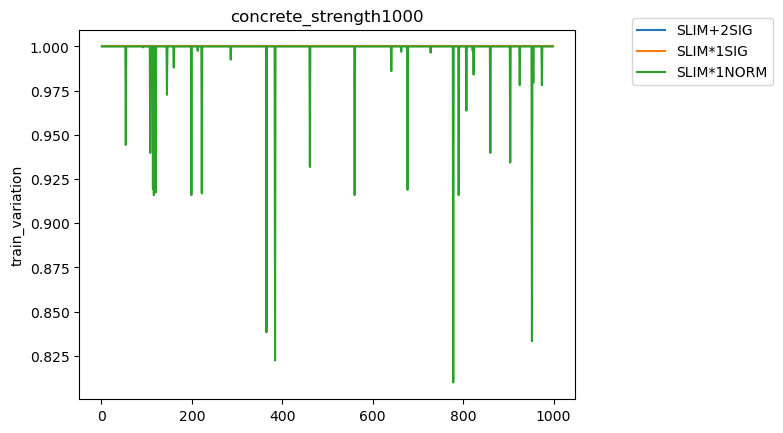

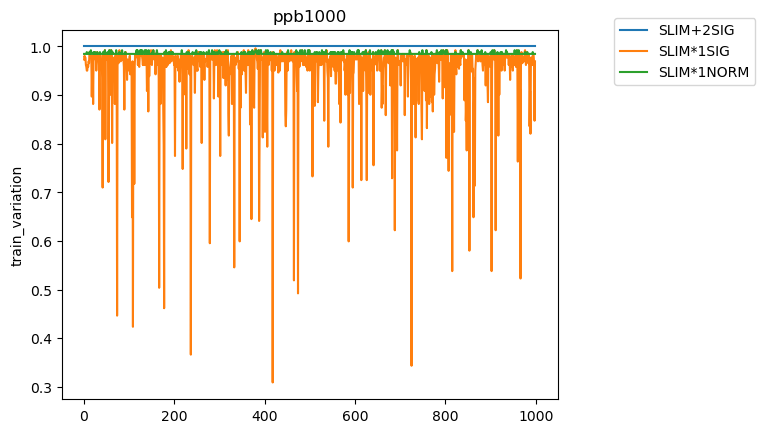

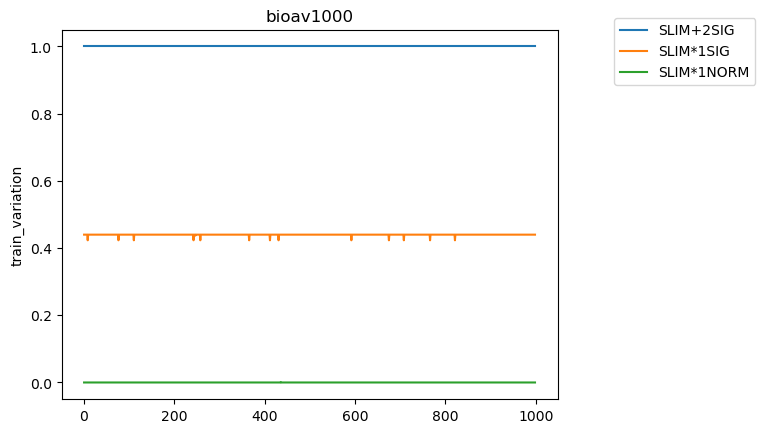

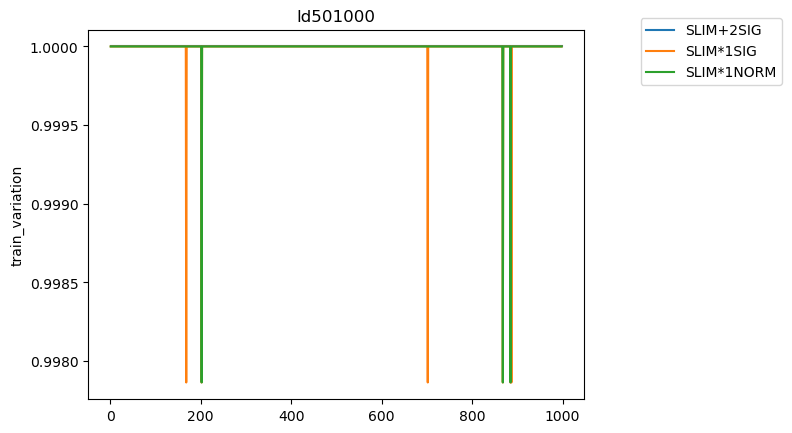

In [11]:
for size in data.query("operator == 'deflate'")['size'].unique():
    for ds in data.dataset.unique():
        # print(ds)
        # gs = gridspec.GridSpec(3, 1)
        # gs.update( wspace=0.6, hspace =  0.5)
        # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
        # ax = pl.subplot(gs[i, 0]) 
        for algo in data.algorithm.unique():
            grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'deflate' and size == @size ")[[
                'operation_index', 'train_variation']].groupby(
                ['operation_index']).median()
            grouped.reset_index(inplace = True)
            plt.plot(grouped.operation_index.values, grouped['train_variation'], label = algo)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.ylabel('train_variation')
        plt.title(ds + str(size))
        plt.show()

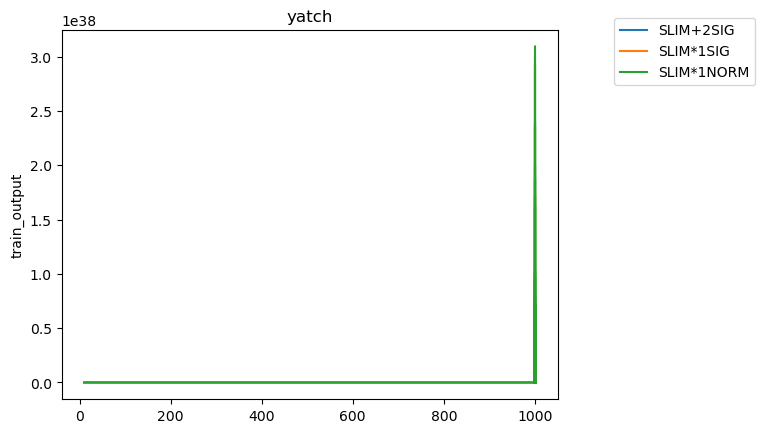

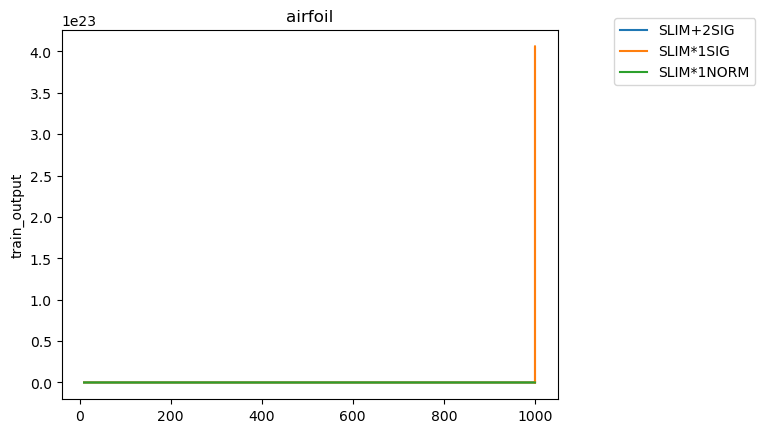

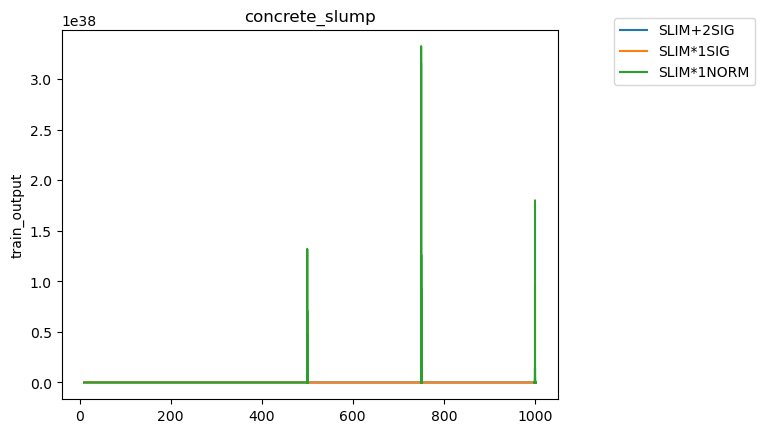

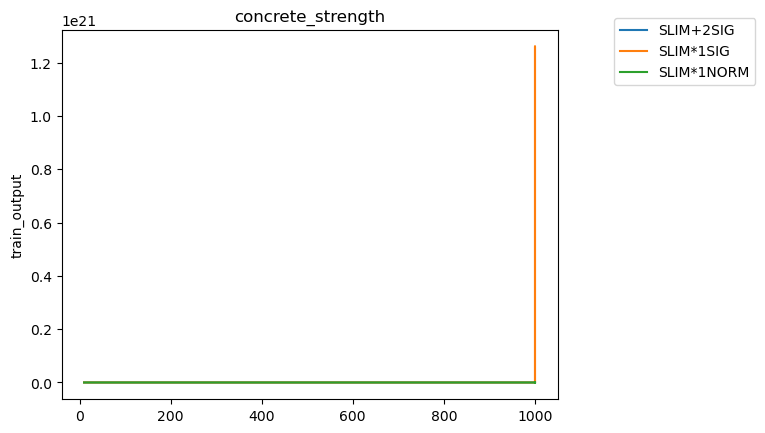

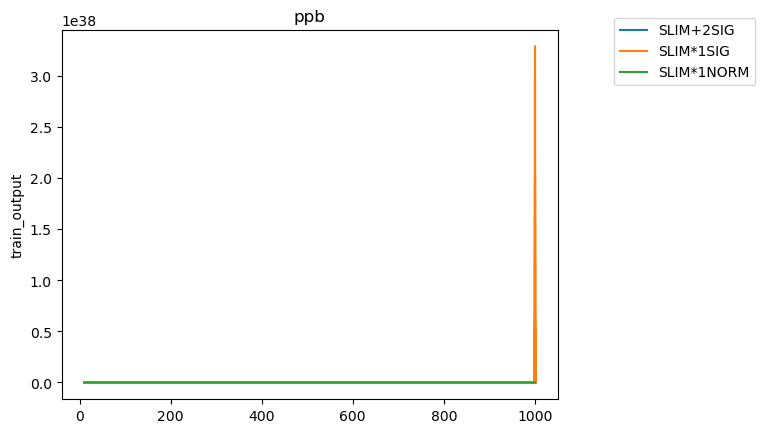

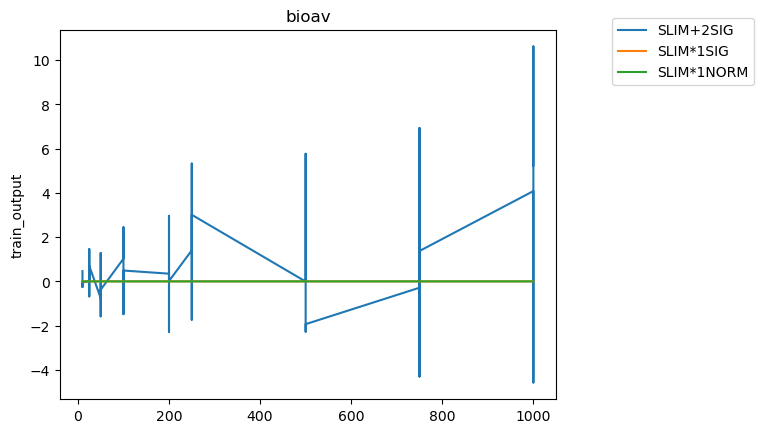

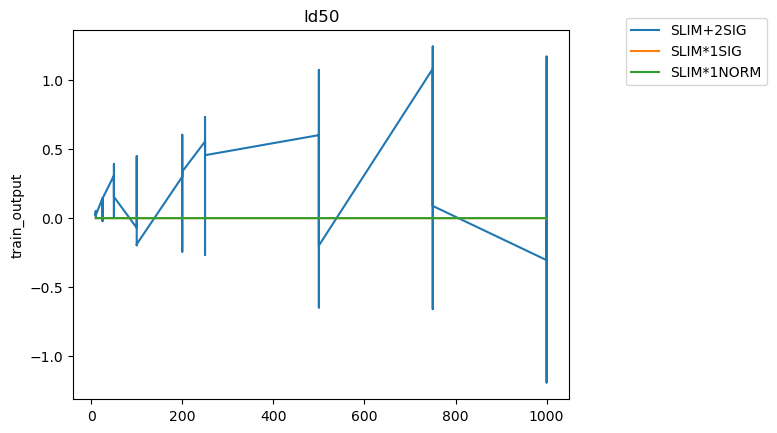

In [15]:
for ds in data.dataset.unique():
    
    # gs = gridspec.GridSpec(3, 1)
    # gs.update( wspace=0.6, hspace =  0.5)
    # for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
    # ax = pl.subplot(gs[i, 0]) 
    for algo in data.algorithm.unique():
        grouped = data.query("dataset == @ds and algorithm == @algo and seed == 7")[[
            'size', 'train_variation', 'train_output']]
        # .groupby(
            # ['size']).median()
        
        # grouped.reset_index(inplace = True)
        grouped['size'] = grouped['size'].astype(int)
        plt.plot(grouped['size'].values, grouped['train_output'], label = algo)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.ylabel('train_output')
    plt.title(ds)
    plt.show()